In [1]:
from IPython.display import Image

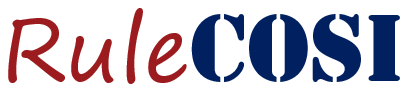

In [2]:
Image(filename='rc-logo.png')

# Demo of the combination and simplification algorithm

In [3]:
import pandas as pd

## For using the library, just import the _RuleCOSIClassifier_ class from **rulecosi** package

In [4]:
from rulecosi import RuleCOSIClassifier

The algorithm works with several type of tree ensembles and it uses the **sklearn** implementations.
- Bagging Trees
- RandomForests
- Gradient Boosting Trees (original implementation)
- XGBoost
- Light GBM
- CatBoost

In [5]:
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

### Load a sample dataset and split the data

We use the Wisconsin diagnostic breast cancer dataset. There are two classes, malignant (0) and benign (1).

In [6]:
data = pd.read_csv('data/wisconsin.csv')

In [7]:
data.head()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


In [8]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1212)

### Simplifying an XGBoost classifier

We create a XGBClassifier instance. The ensemble can be fitted, or it can be just instantiated and RuleCOSI will fit the ensemble first and then simplify it.

In [10]:
ens = XGBClassifier(random_state=1212)

This is done by instanciating a **RuleCOSIClassifier** class with the desired parameters, _n\_estimator_, _tree\_max\_depth_, _conf\_threshold_ and _min\_samples_.

In [11]:
rc = RuleCOSIClassifier(base_ensemble=ens, 
                        metric='f1',n_estimators=100, tree_max_depth=3, 
                        conf_threshold=0.9, cov_threshold=0.0,
                        random_state=1212, column_names=X_train.columns)

In [12]:
%%time
rc.fit(X_train, y_train)

CPU times: total: 1.83 s
Wall time: 838 ms


RuleCOSIClassifier(base_ensemble=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               m...
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=1212,
                                               reg_alpha=None, reg_lambda=None, ...),
                   column_names=Index(['ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion',
       'EpithelialSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli',
       'Mitoses'],
      dtype='object'),
                   conf_threshold=0.9, n_estimators=100, random_state=1212)

## Examining the simplified rules

The rules will be stored in the _simplified\_ruleset_ \_ attribute of the RuleCOSI object. The function _print\_rules_ print the rules and its heuristics on the console. It can also return a string object or a pandas DataFrame object to be used for further analysis. Additionally, the decimal digits displayed on the heuristics values and the condition thresholds can be modified with the _heuristics\_digits_ and the _condition\_digits_ parameters.

In [13]:
rc.simplified_ruleset_.print_rules(heuristics_digits=4, condition_digits=1)

cov 	conf 	supp 	samples 		rule
0.5928	1.0000	0.5928	[0,364]		r_1: (BareNuclei < 2.5) ˄ (CellSize < 3.5) ˄ (NormalNucleoli < 3.5) → [1]
0.0244	1.0000	0.0244	[0,15]		r_2: (BareNuclei < 4.5) ˄ (BlandChromatin < 3.5) ˄ (CellShape < 2.5) → [1]
0.0163	1.0000	0.0163	[0,10]		r_3: (BareNuclei < 8.5) ˄ (BlandChromatin < 3.5) ˄ (ClumpThickness < 6.5) ˄ (MarginalAdhesion < 2.5) ˄ (Mitoses < 2.5) ˄ (NormalNucleoli < 8.5) → [1]
0.0033	1.0000	0.0033	[0,2]		r_4: (CellSize < 2.5) ˄ (ClumpThickness < 3.5) → [1]
0.0016	1.0000	0.0016	[0,1]		r_5: (BareNuclei < 2.5) ˄ (CellSize < 3.5) ˄ (Mitoses < 2.5) ˄ (NormalNucleoli < 8.5) → [1]
0.3616	0.9640	0.3485	[214,8]		r_6: ( ) → [0]



In [14]:
rc.simplified_ruleset_.print_rules(return_object='dataframe',heuristics_digits=4, condition_digits=1)

,cov,conf,supp,samples,#,A,y
0,0.5928,1.0000,0.5928,"[0,364]",r_1,(BareNuclei < 2.5) ˄ (CellSize < 3.5) ˄ (Norma...,[1]
1,0.0244,1.0000,0.0244,"[0,15]",r_2,(BareNuclei < 4.5) ˄ (BlandChromatin < 3.5) ˄ ...,[1]
2,0.0163,1.0000,0.0163,"[0,10]",r_3,(BareNuclei < 8.5) ˄ (BlandChromatin < 3.5) ˄ ...,[1]
3,0.0033,1.0000,0.0033,"[0,2]",r_4,(CellSize < 2.5) ˄ (ClumpThickness < 3.5),[1]
4,0.0016,1.0000,0.0016,"[0,1]",r_5,(BareNuclei < 2.5) ˄ (CellSize < 3.5) ˄ (Mitos...,[1]
5,0.3616,0.9640,0.3485,"[214,8]",r_6,(),[0]


## Checking the classification performance of the simplified rule-based classifier

In [15]:
# this function is used for counting the number of rules extracted from the tree ensemble (original ruelesets)
def get_n_rules(rulesets):
    n_rules = 0
    for ruleset in rulesets:
        for rule in ruleset:
            n_rules += 1
    return n_rules

In [21]:
print(f'== Original XGBoost ensemble ==')
print(f'Number of trees: {rc.base_ensemble_.n_estimators} trees')
print(f'Number of rules: {get_n_rules(rc.original_rulesets_)} rules\n')

print(f'== Simplified rules ==')
rc.simplified_ruleset_.print_rules()
y_pred = rc.predict(X_test)
if isinstance(rc.base_ensemble, XGBClassifier):
    y_pred_ens = rc.base_ensemble_.predict(X_test, validate_features=False)
else:
    y_pred_ens = rc.base_ensemble_.predict(X_test)
print("Combinations: {}".format(rc.n_combinations_))
print("Time: {}\n".format(rc.combination_time_))
print(f'====== Classification performance of XGBoost ======')
print(classification_report(y_test, y_pred_ens,digits=4))
print(f'\n====== Classification performance of simplified rules ======')
print(classification_report(y_test, y_pred,digits=4))
print('\n')


== Original XGBoost ensemble ==
Number of trees: 100 trees
Number of rules: 499 rules

== Simplified rules ==
cov 	conf 	supp 	samples 		rule
0.5928	1.0000	0.5928	[0,364]		r_1: (BareNuclei < 2.500) ˄ (CellSize < 3.500) ˄ (NormalNucleoli < 3.500) → [1]
0.0244	1.0000	0.0244	[0,15]		r_2: (BareNuclei < 4.500) ˄ (BlandChromatin < 3.500) ˄ (CellShape < 2.500) → [1]
0.0163	1.0000	0.0163	[0,10]		r_3: (BareNuclei < 8.500) ˄ (BlandChromatin < 3.500) ˄ (ClumpThickness < 6.500) ˄ (MarginalAdhesion < 2.500) ˄ (Mitoses < 2.500) ˄ (NormalNucleoli < 8.500) → [1]
0.0033	1.0000	0.0033	[0,2]		r_4: (CellSize < 2.500) ˄ (ClumpThickness < 3.500) → [1]
0.0016	1.0000	0.0016	[0,1]		r_5: (BareNuclei < 2.500) ˄ (CellSize < 3.500) ˄ (Mitoses < 2.500) ˄ (NormalNucleoli < 8.500) → [1]
0.3616	0.9640	0.3485	[214,8]		r_6: ( ) → [0]

Combinations: 1446
Time: 0.7530136108398438

====== Classification performance of XGBoost ======
              precision    recall  f1-score   support

           0     0.9615    1.0000   